# Observational study 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotnine
import networkx as nx
from plotnine import ggplot, aes, geom_bar
from functions import *
import statsmodels.formula.api as smf
import spacy
import time
import datetime
import yfinance as yf
import scipy.stats as ss

In [2]:
from popularity import trending_history
from financials import *
from compare import *

In [3]:
data = pd.read_csv('data/FinalFeatures3.csv.bz2')

In [4]:
data

,company,date,close,volume,money_volume,marketcap,popularity,Elon,compare,sentiment,numOccurrences
0,Apple,2015-02-05,27.025126,174826400.0,4.724705e+09,4.433850e+11,38,1,NaN,-0.1761,31
1,Microsoft,2015-02-05,37.361641,34616600.0,1.293333e+09,2.805104e+11,31,0,Apple,0.0000,0
2,IBM,2015-02-05,111.899734,3406299.0,3.811640e+08,1.002980e+11,3,0,Apple,0.0000,0
3,Samsung,2015-02-05,23147.431641,8005050.0,1.852963e+11,1.381851e+14,100,0,Apple,0.0000,0
4,Lenovo,2015-02-05,8.131015,42073541.0,3.421006e+08,9.791124e+10,17,0,Apple,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...
4629,Tesla,2020-04-16,150.778000,65641000.0,9.897219e+09,1.452490e+11,38,1,NaN,0.2553,2
4630,Daimler,2020-04-16,27.833939,8416127.0,2.342540e+08,2.977675e+10,6,0,Tesla,0.0000,0
4631,BMW,2020-04-16,46.932686,3906817.0,1.833574e+08,2.825324e+10,100,0,Tesla,0.0000,0
4632,Volkswagen,2020-04-16,117.395157,2322531.0,2.726539e+08,2.420747e+10,27,0,Tesla,0.0000,0


In [5]:
#the currencies are wrong
#korean won has been about 1050x during the period
data['marketcap'] = np.where(data['company'] == 'Samsung', data['marketcap']/1050, data['marketcap'])
data['money_volume'] = np.where(data['company'] == 'Samsung', data['money_volume']/1050, data['money_volume'])
data['close'] = np.where(data['company'] == 'Samsung', data['close']/1050, data['close'])

#HKD is about 7.8 in the period
data['marketcap'] = np.where(data['company'] == 'Lenovo', data['marketcap']/7.8, data['marketcap'])
data['money_volume'] = np.where(data['company'] == 'Lenovo', data['money_volume']/7.8, data['money_volume'])
data['close'] = np.where(data['company'] == 'Lenovo', data['close']/7.8, data['close'])

#EUR has been between 0.8 and 0.95, we'll put 0.88
data['marketcap'] = np.where(data['company'] == 'BMW', data['marketcap']/0.88, data['marketcap'])
data['money_volume'] = np.where(data['company'] == 'BMW', data['money_volume']/0.88, data['money_volume'])
data['close'] = np.where(data['company'] == 'BMW', data['close']/0.88, data['close'])
data['marketcap'] = np.where(data['company'] == 'Dailmer', data['marketcap']/0.88, data['marketcap'])
data['money_volume'] = np.where(data['company'] == 'Dailmer', data['money_volume']/0.88, data['money_volume'])
data['close'] = np.where(data['company'] == 'Dailmer', data['close']/0.88, data['close'])
data['marketcap'] = np.where(data['company'] == 'VolksWagen', data['marketcap']/0.88, data['marketcap'])
data['money_volume'] = np.where(data['company'] == 'VolksWagen', data['money_volume']/0.88, data['money_volume'])
data['close'] = np.where(data['company'] == 'VolksWagen', data['close']/0.88, data['close'])
data['marketcap'] = np.where(data['company'] == 'Renault', data['marketcap']/0.88, data['marketcap'])
data['money_volume'] = np.where(data['company'] == 'Renault', data['money_volume']/0.88, data['money_volume'])
data['close'] = np.where(data['company'] == 'Renault', data['close']/0.88, data['close'])
data

,company,date,close,volume,money_volume,marketcap,popularity,Elon,compare,sentiment,numOccurrences
0,Apple,2015-02-05,27.025126,174826400.0,4.724705e+09,4.433850e+11,38,1,NaN,-0.1761,31
1,Microsoft,2015-02-05,37.361641,34616600.0,1.293333e+09,2.805104e+11,31,0,Apple,0.0000,0
2,IBM,2015-02-05,111.899734,3406299.0,3.811640e+08,1.002980e+11,3,0,Apple,0.0000,0
3,Samsung,2015-02-05,22.045173,8005050.0,1.764727e+08,1.316048e+11,100,0,Apple,0.0000,0
4,Lenovo,2015-02-05,1.042438,42073541.0,4.385905e+07,1.255272e+10,17,0,Apple,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...
4629,Tesla,2020-04-16,150.778000,65641000.0,9.897219e+09,1.452490e+11,38,1,NaN,0.2553,2
4630,Daimler,2020-04-16,27.833939,8416127.0,2.342540e+08,2.977675e+10,6,0,Tesla,0.0000,0
4631,BMW,2020-04-16,53.332598,3906817.0,2.083607e+08,3.210596e+10,100,0,Tesla,0.0000,0
4632,Volkswagen,2020-04-16,117.395157,2322531.0,2.726539e+08,2.420747e+10,27,0,Tesla,0.0000,0


## Matching : 

In [6]:
add_propensityscore(data)

Optimization terminated successfully.
         Current function value: 0.220606
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   Elon   No. Observations:                 4634
Model:                          Logit   Df Residuals:                     4630
Method:                           MLE   Df Model:                            3
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.5608
Time:                        20:44:35   Log-Likelihood:                -1022.3
converged:                       True   LL-Null:                       -2327.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0469      0.067    -15.555      0.000      -1.179      -0.915
money_volume     8.3449

In [7]:
data

,company,date,close,volume,money_volume,marketcap,popularity,Elon,compare,sentiment,numOccurrences,propensity_score
0,Apple,2015-02-05,-0.450231,5.734199,1.756860,4.375867,0.163384,1,NaN,-0.1761,31,0.987531
1,Microsoft,2015-02-05,-0.361710,0.714446,0.206734,2.497000,-0.024928,0,Apple,0.0000,0,0.009742
2,IBM,2015-02-05,0.276629,-0.402936,-0.205339,0.418128,-0.778177,0,Apple,0.0000,0,0.021478
3,Samsung,2015-02-05,-0.492879,-0.238293,-0.297808,0.779274,1.831293,0,Apple,0.0000,0,0.008331
4,Lenovo,2015-02-05,-0.672745,0.981418,-0.357717,-0.594072,-0.401553,0,Apple,0.0000,0,0.054108
...,...,...,...,...,...,...,...,...,...,...,...,...
4629,Tesla,2020-04-16,0.609580,1.825173,4.093547,0.936668,0.163384,1,NaN,0.2553,2,1.000000
4630,Daimler,2020-04-16,-0.443304,-0.223576,-0.271706,-0.395381,-0.697472,0,Tesla,0.0000,0,0.067226
4631,BMW,2020-04-16,-0.224936,-0.385017,-0.283403,-0.368512,1.831293,0,Tesla,0.0000,0,0.097474
4632,Volkswagen,2020-04-16,0.323692,-0.441737,-0.254358,-0.459627,-0.132535,0,Tesla,0.0000,0,0.097596


We can see that Toyota gets low propensity score because it has a large market cap and low volume

In [8]:
data[data['company'] == 'Toyota'][:4]

,company,date,close,volume,money_volume,marketcap,popularity,Elon,compare,sentiment,numOccurrences,propensity_score
420,Toyota,2015-06-02,0.289208,-0.516285,-0.365223,1.073278,0.809026,0,Ford,0.0,0,0.002043
425,Toyota,2016-04-21,0.117617,-0.507929,-0.357557,0.753002,0.782125,0,Ford,0.0,0,0.004260
430,Toyota,2016-07-21,0.134205,-0.517516,-0.368668,0.783964,0.862830,0,Ford,0.0,0,0.003703
435,Toyota,2017-02-16,0.176964,-0.516281,-0.366641,0.863775,0.916633,0,Ford,0.0,0,0.003220


BMW on the other hand gets higher propensity_scores because it ahs lower market cap and higher volume.
Ideally we would have included more covariates, but it's hard to find good observable covariates for the stock markets, and if we had used categories, it would have been better to have more varied data or else it could have overfitted to one type of category.

In [9]:
data[data['company'] == 'BMW'][:4]

,company,date,close,volume,money_volume,marketcap,popularity,Elon,compare,sentiment,numOccurrences,propensity_score
736,BMW,2015-01-07,-0.041636,-0.459101,-0.315491,-0.219876,1.831293,0,Tesla,0.0,0,0.056865
741,BMW,2015-01-14,-0.029607,-0.439929,-0.295905,-0.210122,1.831293,0,Tesla,0.0,0,0.065024
746,BMW,2015-01-15,-0.011564,-0.425801,-0.279698,-0.195491,1.831293,0,Tesla,0.0,0,0.071655
751,BMW,2015-01-16,-0.007053,-0.470807,-0.323775,-0.191833,1.831293,0,Tesla,0.0,0,0.050349


In [10]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [11]:
def matchingfunction(data):
    treatment_df = data[data['Elon'] == 1]
    control_df   = data[data['Elon'] == 0]
    # Create an empty undirected graph
    G = nx.Graph()
    # Loop through all the pairs of instances
    for control_id, control_row in control_df.iterrows():
        for treatment_id, treatment_row in treatment_df.iterrows():
            if (control_row['compare']== treatment_row['company']) and (control_row['date']== treatment_row['date']) :
                # Calculate the similarity 
                similarity = get_similarity(control_row['propensity_score'],
                                    treatment_row['propensity_score'])
                # Add an edge between the two instances weighted by the similarity between them
                G.add_weighted_edges_from([(control_id, treatment_id, similarity)])
    # Generate and return the maximum weight matching on the generated graph
    matching = nx.max_weight_matching(G)
    return matching

In [12]:
b = matchingfunction(data)

In [13]:
b

{(0, 4),
 (9, 5),
 (10, 14),
 (19, 15),
 (24, 20),
 (25, 29),
 (34, 30),
 (35, 36),
 (40, 44),
 (49, 45),
 (50, 54),
 (59, 55),
 (60, 61),
 (65, 69),
 (74, 70),
 (75, 79),
 (80, 84),
 (89, 85),
 (90, 92),
 (97, 95),
 (104, 100),
 (105, 109),
 (112, 110),
 (115, 117),
 (120, 124),
 (129, 125),
 (130, 134),
 (139, 135),
 (144, 140),
 (145, 147),
 (154, 150),
 (155, 159),
 (160, 163),
 (168, 165),
 (170, 173),
 (179, 175),
 (184, 180),
 (185, 189),
 (193, 190),
 (195, 197),
 (200, 202),
 (209, 205),
 (210, 211),
 (216, 215),
 (220, 222),
 (224, 227),
 (228, 231),
 (232, 234),
 (236, 238),
 (240, 243),
 (244, 247),
 (248, 250),
 (252, 254),
 (256, 259),
 (260, 262),
 (264, 266),
 (268, 270),
 (272, 274),
 (276, 279),
 (280, 282),
 (284, 287),
 (288, 291),
 (292, 294),
 (296, 298),
 (300, 302),
 (304, 305),
 (308, 309),
 (312, 314),
 (316, 318),
 (320, 323),
 (324, 327),
 (328, 330),
 (332, 335),
 (336, 339),
 (340, 343),
 (344, 348),
 (353, 349),
 (354, 357),
 (362, 359),
 (364, 367),
 (36

In [14]:
tesla_match = []
apple_match = []
twitter_match = []
ford_match = []
paypal_match = []
for pair in b:
    l = (data.iloc[int(pair[0])]['company'], data.iloc[int(pair[1])]['company'], data.iloc[int(pair[0])]['date'])
    if 'Tesla' in l:
        tesla_match.append(l)
    elif 'Apple' in l:
        apple_match.append(l)
    elif 'Twitter' in l:
        twitter_match.append(l)
    elif 'Ford' in l:
        ford_match.append(l)
    elif 'PayPal' in l:
        paypal_match.append(l)
apple_match[0:8]

[('Lenovo', 'Apple', '2015-05-14'),
 ('Lenovo', 'Apple', '2018-08-11'),
 ('Lenovo', 'Apple', '2015-02-24'),
 ('Apple', 'Lenovo', '2015-02-21'),
 ('Lenovo', 'Apple', '2015-10-10'),
 ('Lenovo', 'Apple', '2016-07-03'),
 ('Apple', 'Lenovo', '2015-05-06'),
 ('Apple', 'IBM', '2018-11-02')]

In [15]:
tesla_match

[('General Motors', 'Tesla', '2016-08-10'),
 ('Volkswagen', 'Tesla', '2015-10-14'),
 ('Volkswagen', 'Tesla', '2018-11-01'),
 ('General Motors', 'Tesla', '2017-10-21'),
 ('Volkswagen', 'Tesla', '2019-06-10'),
 ('Tesla', 'General Motors', '2018-04-02'),
 ('Tesla', 'BMW', '2019-12-25'),
 ('Tesla', 'General Motors', '2017-07-28'),
 ('General Motors', 'Tesla', '2016-04-20'),
 ('Tesla', 'Volkswagen', '2017-10-26'),
 ('Tesla', 'Volkswagen', '2016-07-15'),
 ('Tesla', 'General Motors', '2017-04-07'),
 ('General Motors', 'Tesla', '2015-05-09'),
 ('Tesla', 'General Motors', '2015-03-19'),
 ('Tesla', 'Volkswagen', '2015-10-11'),
 ('Tesla', 'Volkswagen', '2019-10-29'),
 ('Tesla', 'General Motors', '2018-02-01'),
 ('Volkswagen', 'Tesla', '2018-12-28'),
 ('Tesla', 'Volkswagen', '2019-03-05'),
 ('Tesla', 'BMW', '2019-05-07'),
 ('Tesla', 'Volkswagen', '2017-04-03'),
 ('Tesla', 'Volkswagen', '2017-12-11'),
 ('Tesla', 'General Motors', '2018-05-26'),
 ('Tesla', 'Volkswagen', '2015-03-16'),
 ('Volkswagen'

In [16]:
apple_match[:15]

[('Lenovo', 'Apple', '2015-05-14'),
 ('Lenovo', 'Apple', '2018-08-11'),
 ('Lenovo', 'Apple', '2015-02-24'),
 ('Apple', 'Lenovo', '2015-02-21'),
 ('Lenovo', 'Apple', '2015-10-10'),
 ('Lenovo', 'Apple', '2016-07-03'),
 ('Apple', 'Lenovo', '2015-05-06'),
 ('Apple', 'IBM', '2018-11-02'),
 ('Apple', 'Lenovo', '2015-10-09'),
 ('Apple', 'Lenovo', '2015-10-12'),
 ('Apple', 'Microsoft', '2015-03-12'),
 ('Microsoft', 'Apple', '2020-03-12'),
 ('Lenovo', 'Apple', '2018-08-10'),
 ('Samsung', 'Apple', '2017-07-17'),
 ('Lenovo', 'Apple', '2017-06-14')]

In [34]:
first_date = data.iloc[0]['date']

In [35]:
tesla_c = {'Tesla' : stock_history('Tesla', first_date, '2021-01-01'),
            'Daimler' : stock_history('Daimler', first_date, '2021-01-01'),
            'BMW' : stock_history('BMW', first_date, '2021-01-01'),
            'Volkswagen' : stock_history('Volkswagen', first_date, '2021-01-01'),
            'General Motors' : stock_history('General Motors', first_date, '2021-01-01')}

In [36]:
apple_c = {'Apple' : stock_history('Apple', first_date, '2021-01-01'),
            'IBM' : stock_history('IBM', first_date, '2021-01-01'),
            'Samsung' : stock_history('Samsung', first_date, '2021-01-01'),
            'Lenovo' : stock_history('Lenovo', first_date, '2021-01-01'),
            'Microsoft' : stock_history('Microsoft', first_date, '2021-01-01')}

In [37]:
twitter_c = {'Twitter' : stock_history('Twitter', first_date, '2021-01-01'),
            'Google' : stock_history('Google', first_date, '2021-01-01'),
            'Facebook' : stock_history('Facebook', first_date, '2021-01-01'),
            'Snapchat' : stock_history('Snapchat', first_date, '2021-01-01'),
            'Pinterest' : stock_history('Pinterest', first_date, '2021-01-01')}

In [38]:
ford_c = {'Ford' : stock_history('Ford', first_date, '2021-01-01'),
            'Toyota' : stock_history('Toyota', first_date, '2021-01-01'),
            'Renault' : stock_history('Renault', first_date, '2021-01-01'),
            'General Motors' : stock_history('General Motors', first_date, '2021-01-01'),
            'Stellantis' : stock_history('Stellantis', first_date, '2021-01-01')}

In [39]:
paypal_c = {'PayPal' : stock_history('PayPal', first_date, '2021-01-01'),
            'Western Union' : stock_history('Western Union', first_date, '2021-01-01'),
            'Euronet' : stock_history('Euronet', first_date, '2021-01-01'),
            'American Express' : stock_history('American Express', first_date, '2021-01-01'),
            'Visa' : stock_history('Visa', first_date, '2021-01-01')}

In [40]:
def hist_from_hist(hist, start_date, end_date):
    internal_np = []
    for i in range(len(hist)):
        if hist.iloc[i].name.date() < datetime.date.fromisoformat(start_date):
            start = i
        if hist.iloc[i].name.date() > datetime.date.fromisoformat(end_date):
            end = i-1
            break
    return hist.copy().iloc[start:end]
def get_dates_c(start_date, weeks, days):
    start_date = dt.datetime.strptime(start_date, '%Y-%m-%d')
    end_date = start_date + dt.timedelta(weeks=weeks, days=days)
    return start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')
def dailyChangeC(hist, start_date, end_date):
    df = hist_from_hist(hist, start_date, end_date)
    result = []
    for i in range(len(df)-1):
        changeFromPreviousDay = 1-(df.iloc[i+1]['Close']/df.iloc[i]['Close'])
        result.append(float(changeFromPreviousDay))
    dates = [*df.index]
    dates = [*map(lambda n: n.strftime("%Y-%m-%d"), dates)]
    dates = dates[1:]
    return result, dates

In [41]:
dailyChangeC(apple_c['Apple'], '2015-03-10', '2015-03-15')

([0.020685796451588634, 0.018231623588158663, -0.018079090381238005],
 ['2015-03-10', '2015-03-11', '2015-03-12'])

In [42]:
days = 5

In [43]:
def change_distributions(company_match, company_c):
    co = {[*company_c.keys()][0] : {'x' : [], 'y' : []},
        [*company_c.keys()][1] : {'x' : [], 'y' : []},
        [*company_c.keys()][2] : {'x' : [], 'y' : []},
        [*company_c.keys()][3] : {'x' : [], 'y' : []},
        [*company_c.keys()][4] : {'x' : [], 'y' : []}}
    
    for i in range(len(company_match)):
        dates = get_dates_c(company_match[i][2], 0, days)
        comp1 = company_match[i][0]
        try:
            temp, _ = dailyChangeC(company_c[comp1], dates[0], dates[1])
            co[comp1]['x'].extend(temp)
            co[comp1]['y'].extend([*range(len(temp))])
        except:
            print('error with:', comp1)

        comp2 = company_match[i][1]
        try:
            temp, _ = dailyChangeC(company_c[comp2], dates[0], dates[1])
            co[comp2]['x'].extend(temp)
            co[comp2]['y'].extend([*range(len(temp))])
        except:
            print('error with:', comp2)

    fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,sharey=True,figsize=(15,5))
    ax1.scatter([*co.values()][0]['y'], [*co.values()][0]['x'])
    ax1.set_title([*co.keys()][0])
    ax2.scatter([*co.values()][1]['y'], [*co.values()][1]['x'], label=[*co.keys()][1])
    ax2.set_title([*co.keys()][1])
    ax3.scatter([*co.values()][2]['y'], [*co.values()][2]['x'], label=[*co.keys()][2])
    ax3.set_title([*co.keys()][2])
    ax4.scatter([*co.values()][3]['y'], [*co.values()][3]['x'], label=[*co.keys()][3])
    ax4.set_title([*co.keys()][3])
    ax5.scatter([*co.values()][4]['y'], [*co.values()][4]['x'], label=[*co.keys()][4])
    ax5.set_title([*co.keys()][4])
    
    return co

error with: Lenovo


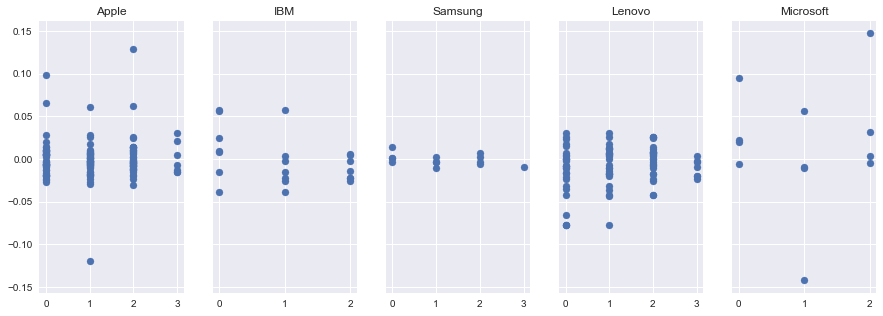

In [44]:
apple_dist = change_distributions(apple_match, apple_c)

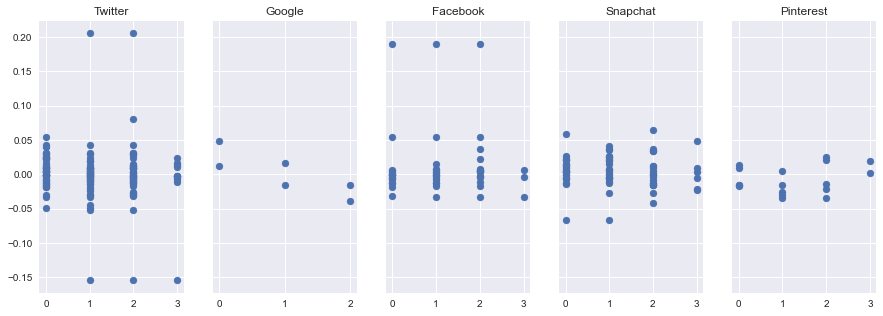

In [45]:
twitter_dist = change_distributions(twitter_match, twitter_c)

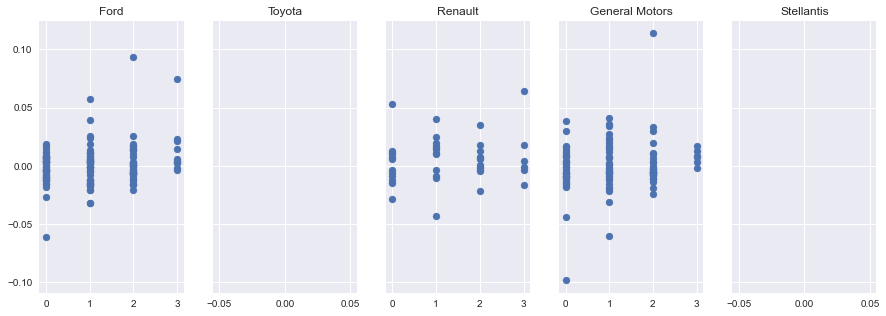

In [46]:
ford_dist = change_distributions(ford_match, ford_c)

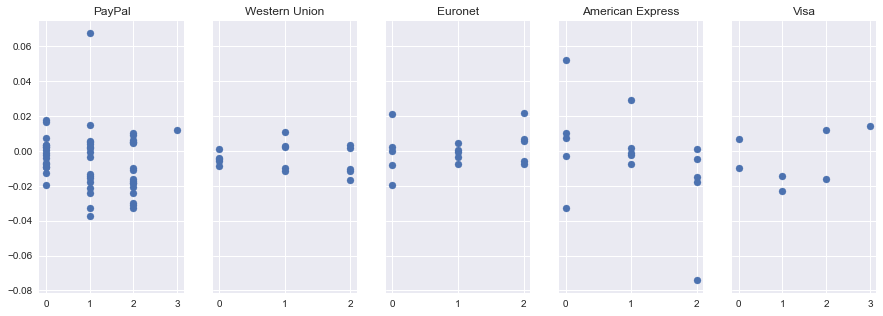

In [47]:
paypal_dist = change_distributions(paypal_match, paypal_c)

error with: General Motors
error with: Tesla
error with: Tesla
error with: General Motors
error with: Tesla
error with: General Motors
error with: Tesla
error with: General Motors
error with: General Motors
error with: Tesla
error with: General Motors
error with: Tesla
error with: General Motors
error with: Tesla


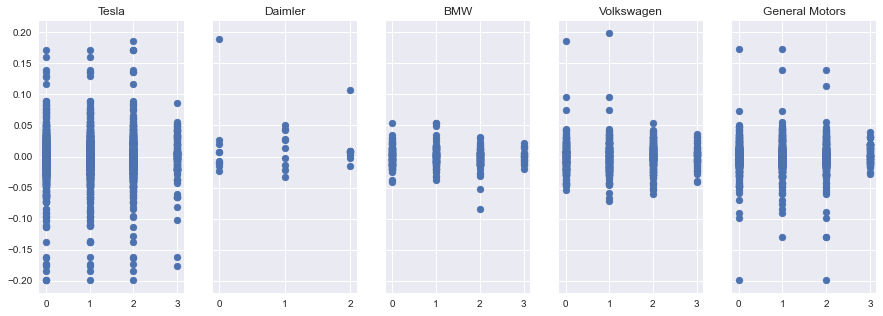

In [48]:
tesla_dist = change_distributions(tesla_match, tesla_c)

### Test on distribution

In [49]:
import scipy

In [51]:
def anova_oneway(comp_dist):
    A = comp_dist[[*comp_dist.keys()][0]]['x']
    B = comp_dist[[*comp_dist.keys()][1]]['x']
    C = comp_dist[[*comp_dist.keys()][2]]['x']
    D = comp_dist[[*comp_dist.keys()][3]]['x']
    E = comp_dist[[*comp_dist.keys()][4]]['x']
    return scipy.stats.f_oneway(A,B,C,D,E)

In [52]:
anova_oneway(twitter_dist)

F_onewayResult(statistic=1.168856353348156, pvalue=0.324691335883517)

### F-score

### t-test

In [65]:
apple_match[:5]

[('Lenovo', 'Apple', '2015-05-14'),
 ('Lenovo', 'Apple', '2018-08-11'),
 ('Lenovo', 'Apple', '2015-02-24'),
 ('Apple', 'Lenovo', '2015-02-21'),
 ('Lenovo', 'Apple', '2015-10-10')]

In [54]:
def t_distributions(company_match, company_c):
    co = {[*company_c.keys()][1] : {'main' : {'x' : [], 'y' : []},
                                    'match' : {'x' : [], 'y' : []}},
        [*company_c.keys()][2] : {'main' : {'x' : [], 'y' : []},
                                    'match' : {'x' : [], 'y' : []}},
        [*company_c.keys()][3] : {'main' : {'x' : [], 'y' : []},
                                    'match' : {'x' : [], 'y' : []}},
        [*company_c.keys()][4] : {'main' : {'x' : [], 'y' : []},
                                    'match' : {'x' : [], 'y' : []}}}
    
    for i in range(len(company_match)):
        dates = get_dates_c(company_match[i][2], 0, days)
        if company_match[i][0] == [*company_c.keys()][0]:
            other_comp = company_match[i][1]
        else:
            other_comp = company_match[i][0]
            
        try:
            temp1, dat = dailyChangeC(company_c[other_comp], dates[0], dates[1])
            co[other_comp]['match']['x'].extend(temp1)
            co[other_comp]['match']['y'].extend(dat)
            
            temp2, dat = dailyChangeC(company_c[[*company_c.keys()][0]], dates[0], dates[1])
            co[other_comp]['main']['x'].extend(temp2)
            co[other_comp]['main']['y'].extend(dat)
        except:
            print('error with:', other_comp)
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharey=True,figsize=(15,5))

    i = 0
    for ax in [ax1,ax2,ax3,ax4]:
        #np.unique(np.asarray(
        main_x = [*co.values()][i]['main']['x']
        main_y = [*co.values()][i]['main']['y']
        match_x = [*co.values()][i]['match']['x']
        match_y = [*co.values()][i]['match']['y']
        
        ax.scatter(match_y, match_x, label=[*co.keys()][i])
        ax.scatter(main_y, main_x, label=[*company_c.keys()][0])
        ax.set_title([*co.keys()][i] + '/' + [*company_c.keys()][0])
        ax.axes.get_xaxis().set_visible(False)
        i += 1
    
    fig.legend()
    fig.savefig('figures/observational{}.svg'.format([*company_c.keys()][0]))
    fig.show()
    
    return co

error with: Lenovo


C:\Users\Ferdi\AppData\Local\Temp/ipykernel_20448/299266132.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


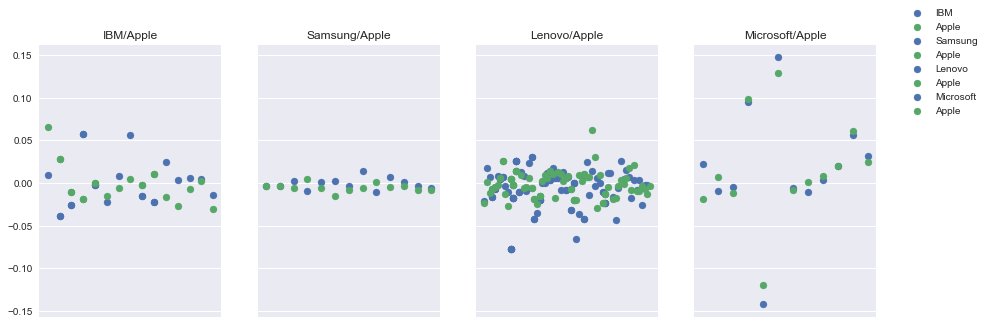

In [55]:
apple_dist = t_distributions(apple_match, apple_c)

In [56]:
for comp in apple_dist:
    print(comp,ss.mannwhitneyu(apple_dist[comp]['main']['x'], apple_dist[comp]['match']['x']))

IBM MannwhitneyuResult(statistic=232.0, pvalue=0.7818969961187895)
Samsung MannwhitneyuResult(statistic=49.0, pvalue=0.07267412867689323)
Lenovo MannwhitneyuResult(statistic=4394.0, pvalue=0.20719648581932448)
Microsoft MannwhitneyuResult(statistic=70.0, pvalue=0.9309874465595671)


C:\Users\Ferdi\AppData\Local\Temp/ipykernel_20448/299266132.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


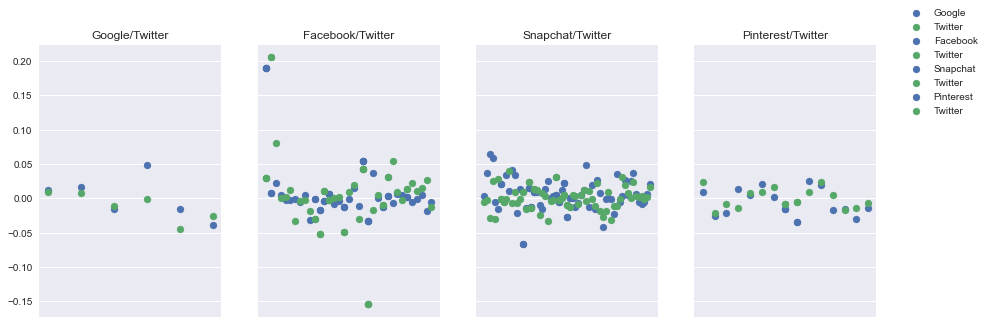

In [57]:
twitter_dist = t_distributions(twitter_match, twitter_c)

In [58]:
for comp in twitter_dist:
    print(comp,ss.mannwhitneyu(twitter_dist[comp]['main']['x'], twitter_dist[comp]['match']['x']))

Google MannwhitneyuResult(statistic=13.0, pvalue=0.48484848484848486)
Facebook MannwhitneyuResult(statistic=1391.0, pvalue=0.5468909935184665)
Snapchat MannwhitneyuResult(statistic=2267.0, pvalue=0.19477620553450214)
Pinterest MannwhitneyuResult(statistic=185.0, pvalue=0.1681531290926782)


C:\Users\Ferdi\AppData\Local\Temp/ipykernel_20448/299266132.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


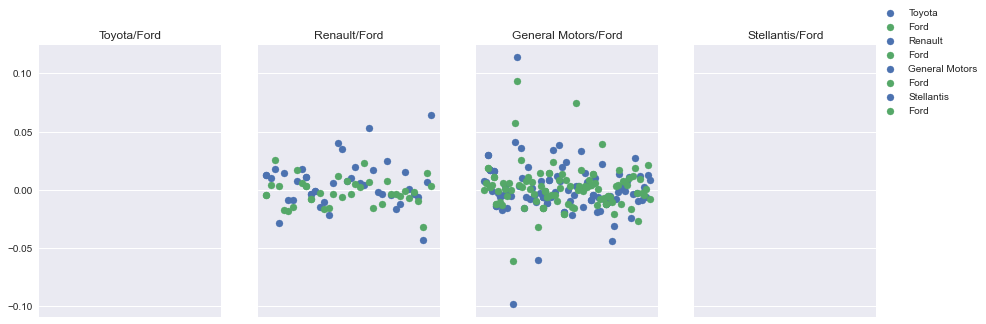

In [59]:
ford_dist = t_distributions(ford_match, ford_c)

In [60]:
for comp in ford_dist:
    try:
        print(comp,ss.mannwhitneyu(ford_dist[comp]['main']['x'], ford_dist[comp]['match']['x']))
    except:
        print('empty')

empty
Renault MannwhitneyuResult(statistic=598.0, pvalue=0.037136256414410235)
General Motors MannwhitneyuResult(statistic=5682.0, pvalue=0.5285921958576796)
empty


C:\Users\Ferdi\AppData\Local\Temp/ipykernel_20448/299266132.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


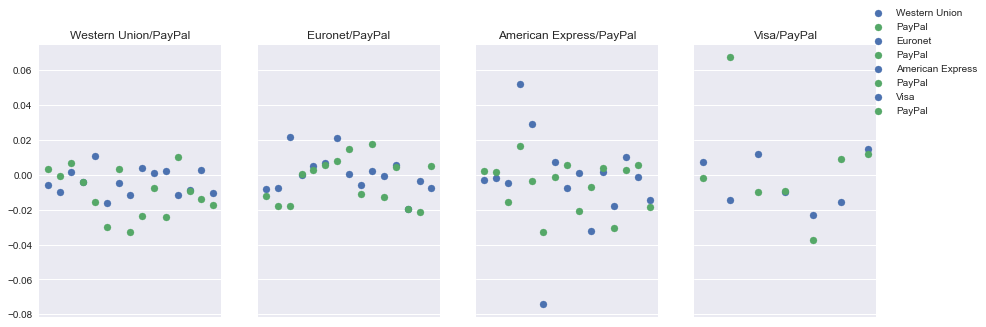

In [61]:
paypal_dist = t_distributions(paypal_match, paypal_c)

In [62]:
for comp in paypal_dist:
    try:
        print(comp,ss.mannwhitneyu(paypal_dist[comp]['main']['x'], paypal_dist[comp]['match']['x']))
    except:
        print('empty')

Western Union MannwhitneyuResult(statistic=85.0, pvalue=0.26275304114766074)
Euronet MannwhitneyuResult(statistic=95.0, pvalue=0.48073111045562256)
American Express MannwhitneyuResult(statistic=109.0, pvalue=0.9009714934164412)
Visa MannwhitneyuResult(statistic=30.0, pvalue=0.534965034965035)


error with: General Motors
error with: General Motors
error with: General Motors
error with: General Motors
error with: General Motors
error with: General Motors
error with: General Motors


C:\Users\Ferdi\AppData\Local\Temp/ipykernel_20448/299266132.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


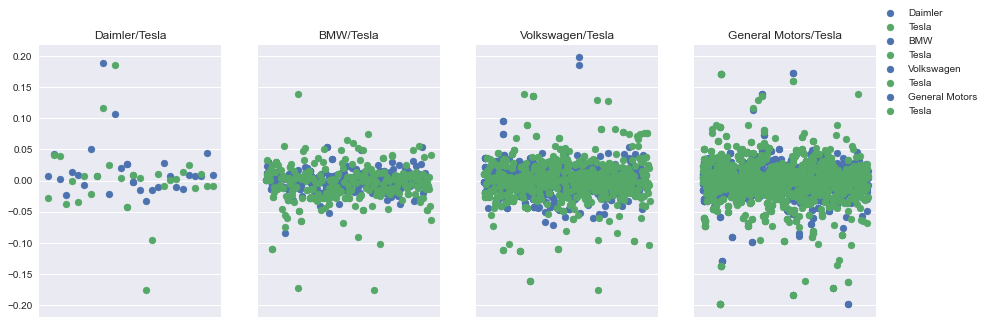

In [63]:
tesla_dist = t_distributions(tesla_match, tesla_c)

In [64]:
for comp in tesla_dist:
    try:
        print(comp,ss.mannwhitneyu(tesla_dist[comp]['main']['x'], tesla_dist[comp]['match']['x']))
    except:
        print('empty')

Daimler MannwhitneyuResult(statistic=368.0, pvalue=0.22820421433941152)
BMW MannwhitneyuResult(statistic=45049.0, pvalue=0.01735656673757902)
Volkswagen MannwhitneyuResult(statistic=272731.5, pvalue=0.46236044154701805)
General Motors MannwhitneyuResult(statistic=855052.0, pvalue=0.907735912135226)
